# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas seaborn sklearn

---

---

# 1. 라이브러리 Import 및 데이터 불러오기

* sklearn 을 설치 하세요. 

* 관련 라이브러리들을 불러오세요

In [4]:
import pandas as pd

# 학습/평가 데이터 로딩
train_x = pd.read_csv("train_x.csv")
train_y = pd.read_csv("train_y.csv")
test_x = pd.read_csv("test_x.csv")
test_y = pd.read_csv("test_y.csv")

#### [실습문제1] 라이브러리 불러오기



In [5]:
# 필요한 라이브러리를 불러오세요.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import*
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')

---

In [18]:
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # 전체 시각화
    plt.figure(figsize = (20,12))
    plt.subplot(2,1,1)
    plt.plot(y_train, label = 'train')
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.subplot(2,1,2)
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.show()

# 2. Modeling
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제2] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [38]:
# 아래 함수는 로지스틱 회귀를 위한 전진선택법 함수 입니다.
import statsmodels.api as sm

def forward_stepwise_logistic(x_train, y_train):

    # 변수목록, 선택된 변수 목록, 단계별 모델과 AIC 저장소 정의
    features = list(x_train)
    selected = []
    step_df = pd.DataFrame({ 'step':[], 'feature':[],'aic':[]})

    # 
    for s in range(0, len(features)) :
        result =  { 'step':[], 'feature':[],'aic':[]}

        # 변수 목록에서 변수 한개씩 뽑아서 모델에 추가
        for f in features :
            vars = selected + [f]
            x_tr = x_train[vars]
            model = sm.Logit(y_train, x_tr).fit()
            result['step'].append(s+1)
            result['feature'].append(vars)
            result['aic'].append(model.aic)
        
        # 모델별 aic 집계
        temp = pd.DataFrame(result).sort_values('aic').reset_index(drop = True)

        # 만약 이전 aic보다 새로운 aic 가 크다면 멈추기
        if step_df['aic'].min() < temp['aic'].min() :
            break
        step_df = pd.concat([step_df, temp], axis = 0).reset_index(drop = True)

        # 선택된 변수 제거
        v = temp.loc[0,'feature'][s]
        features.remove(v)

        selected.append(v)
    
    # 선택된 변수와 step_df 결과 반환
    return selected, step_df

In [39]:
vars, result = forward_stepwise_logistic(train_x,train_y)

ValueError: endog must be in the unit interval.

In [19]:
# 아래에 실습코드를 작성하세요.
m1 = LinearRegression()
m1.fit(train_x,train_y)
p1 = m1.predict(test_x)

In [20]:
# Test 데이터로 성능을 평가해보세요.
print(mean_squared_error(test_y,p1,squared=False).round(5))
print(r2_score(test_y,p1).round(5))

6.51368
0.92301


In [10]:
# 학습한 모델을 파일로 저장해보세요.

p1 = pd.DataFrame(p1)
p1.to_pickle('1모델LiearModel.pkl')

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언브스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제3] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [23]:
# 아래에 실습코드를 작성하세요.
par2 = {'max_depth':range(1,3), 'min_samples_leaf':range(50,101,10)}
m2 = RandomForestRegressor()
m2_gs = GridSearchCV(m2, par2,cv=5,verbose=3)
m2_gs.fit(train_x,train_y)
p2 = m2_gs.predict(test_x)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...............max_depth=1, min_samples_leaf=50; total time=   0.5s
[CV 2/5] END ...............max_depth=1, min_samples_leaf=50; total time=   0.4s
[CV 3/5] END ...............max_depth=1, min_samples_leaf=50; total time=   0.6s
[CV 4/5] END ...............max_depth=1, min_samples_leaf=50; total time=   0.7s
[CV 5/5] END ...............max_depth=1, min_samples_leaf=50; total time=   0.7s
[CV 1/5] END ...............max_depth=1, min_samples_leaf=60; total time=   0.7s
[CV 2/5] END ...............max_depth=1, min_samples_leaf=60; total time=   0.7s
[CV 3/5] END ...............max_depth=1, min_samples_leaf=60; total time=   0.7s
[CV 4/5] END ...............max_depth=1, min_samples_leaf=60; total time=   0.7s
[CV 5/5] END ...............max_depth=1, min_samples_leaf=60; total time=   0.7s
[CV 1/5] END ...............max_depth=1, min_samples_leaf=70; total time=   0.6s
[CV 2/5] END ...............max_depth=1, min_sam

In [24]:
# Test 데이터로 성능을 평가해보세요.
print(mean_squared_error(test_y,p2,squared=False).round(5))
print(r2_score(test_y,p2).round(5))

15.14802
0.58364


In [10]:
# 학습한 모델을 파일로 저장해보세요.
p2 = pd.DataFrame(p2)
p2.to_pickle('2모델RF.pkl')

#### [실습문제4] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [34]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

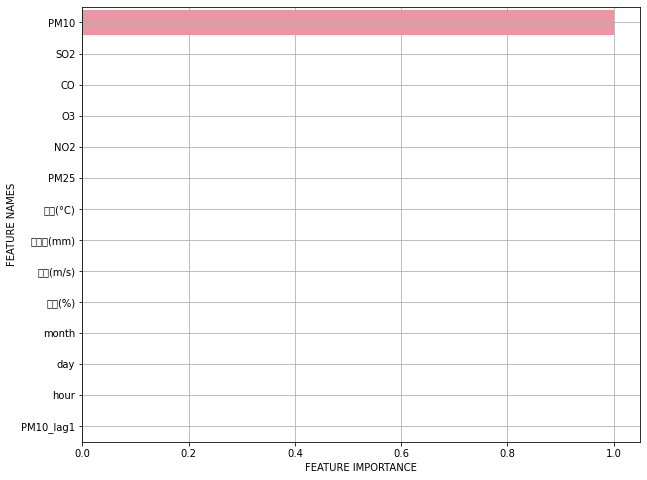

In [51]:
# Feature의 중요도 확인

r = plot_feature_importance(m2_gs.best_estimator_.feature_importances_, list(train_x)) # 튜닝했기 때문에

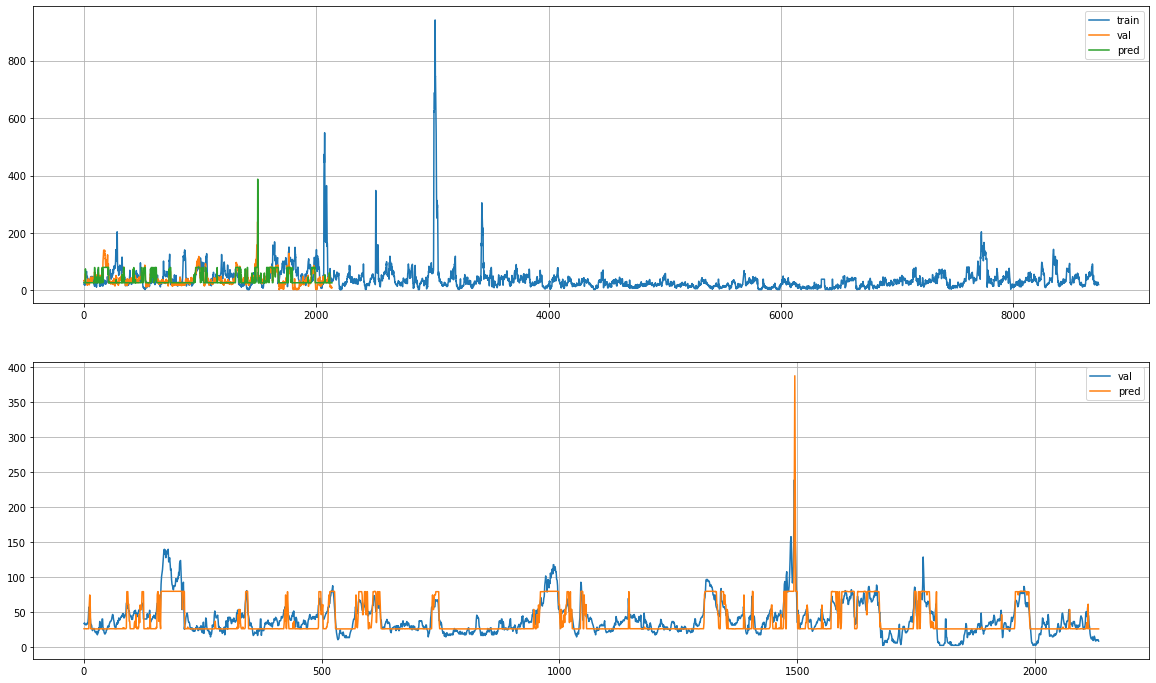

In [25]:
plot_model_result(train_y, test_y, p2)

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제5] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [26]:
# 아래에 실습코드를 작성하세요.
m3 = GradientBoostingRegressor(random_state=0)
m3.fit(train_x,train_y)
p3 = m3.predict(test_x)

In [27]:
# Test 데이터로 성능을 평가해보세요.
print(mean_squared_error(test_y,p3,squared=False).round(5))
print(r2_score(test_y,p3).round(5))

7.35859
0.90175


In [ ]:
# 학습한 모델을 파일로 저장해보세요.
p3 = pd.DataFrame(p3)
p3.to_pickle('3모델GBR.pkl')

#### [실습문제6] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

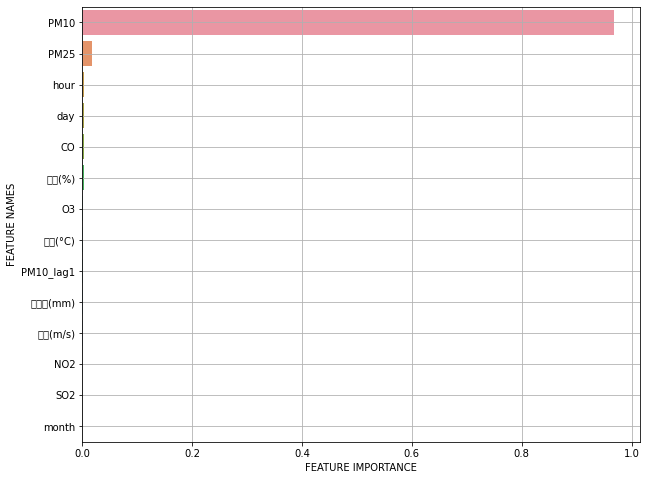

In [55]:
# Feature의 중요도 확인

r = plot_feature_importance(m3.feature_importances_, list(train_x)) 

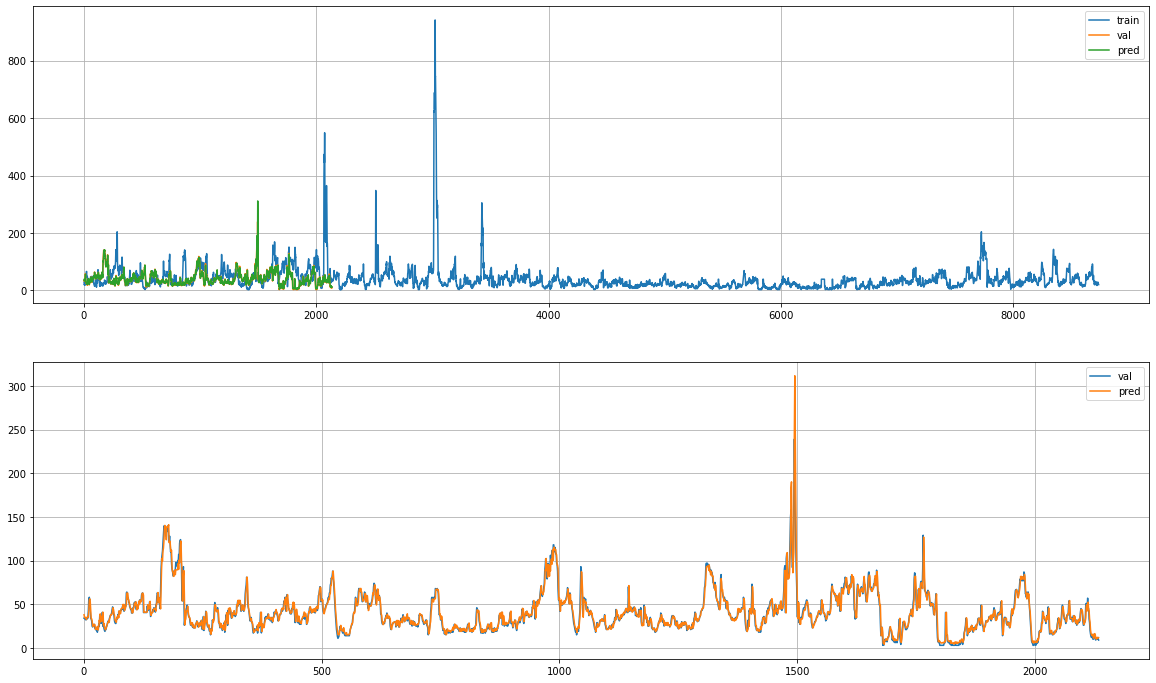

In [28]:
plot_model_result(train_y, test_y, p3)

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제7] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지, 반올림)

In [2]:
from xgboost import XGBRegressor

In [30]:
# 아래에 실습코드를 작성하세요.
par4 = {'learning_rate' : np.linspace(0.01,0.2,50), 'n_estimators':range(60,200,50), 'max_depth':[3,4]}
m4 = XGBRegressor()
m4_gs = GridSearchCV(m4, par4, cv=5)
m4_gs.fit(train_x,train_y)
p4 = m4_gs.predict(test_x)

In [31]:
# Test 데이터로 성능을 평가해보세요.
print(mean_squared_error(test_y,p4,squared=False).round(5))
print(r2_score(test_y,p4).round(5))

7.4096
0.90038


In [ ]:
# 학습한 모델을 파일로 저장해보세요.
p4 = pd.DataFrame(p4)
p4.to_pickle('4모델XGB.pkl')

#### [실습문제8] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

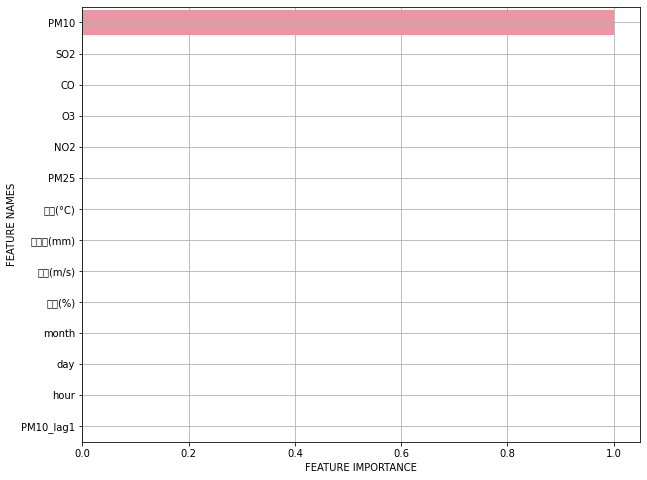

In [39]:
# Feature의 중요도 확인
r = plot_feature_importance(m2_gs.best_estimator_.feature_importances_, list(train_x)) # 튜닝했기 때문에

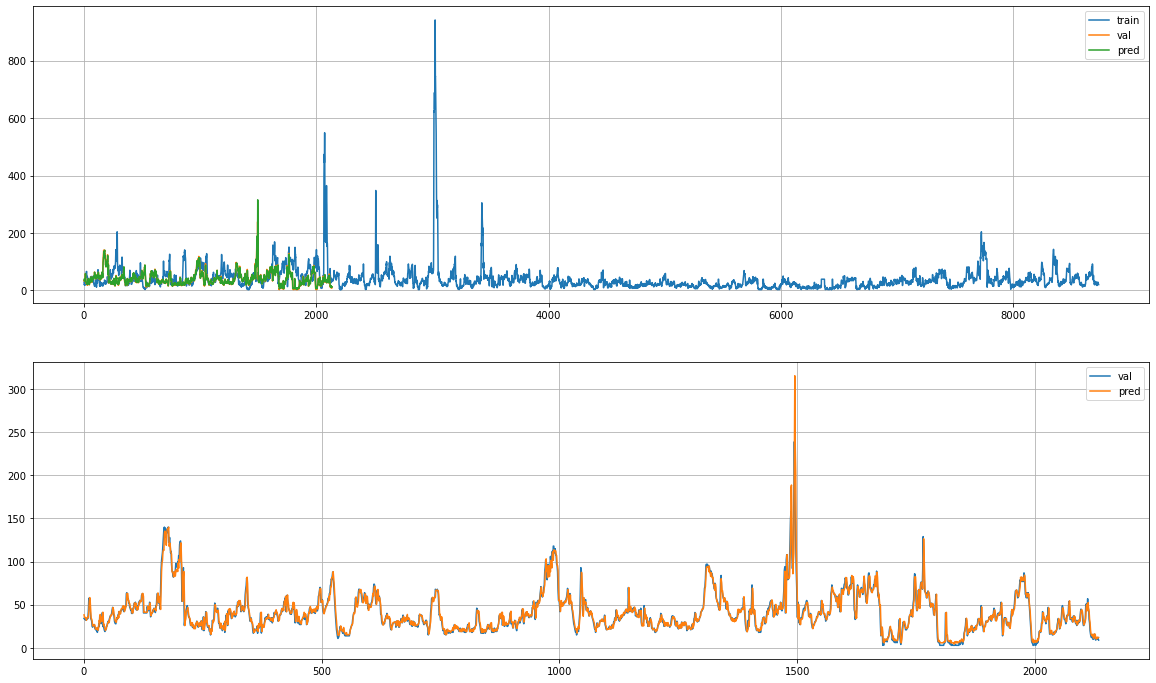

In [41]:
plot_model_result(train_y, test_y, p4)

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.